In [2]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"dreamer01","key":"24cd8d8efae036c8df419905e66e47fe"}'}

In [3]:
!mkdir -p ~/.kaggle
# p 옵션은 중간에 존재하지 않는 디렉토리를 자동으로 생성해주는 옵션
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         80           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        105           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        911           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        166           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1920           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      13748           False  
house-pr

In [6]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 34.3MB/s]
100% 541M/543M [00:02<00:00, 199MB/s]
100% 543M/543M [00:02<00:00, 193MB/s]
 97% 263M/271M [00:01<00:00, 194MB/s]
100% 271M/271M [00:01<00:00, 183MB/s]


In [7]:
!unzip train.zip
!unzip test1.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           
  inflating: t

# **CAT,DOG 분류 시작**

## 필요한 라이브러리 import

In [9]:
import numpy as np 
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

print(os.listdir("./train"))

['dog.9240.jpg', 'dog.6476.jpg', 'dog.1865.jpg', 'dog.6650.jpg', 'cat.4229.jpg', 'dog.1626.jpg', 'cat.864.jpg', 'cat.10989.jpg', 'cat.8700.jpg', 'cat.9626.jpg', 'dog.8684.jpg', 'cat.1095.jpg', 'dog.6495.jpg', 'cat.8265.jpg', 'dog.10994.jpg', 'cat.100.jpg', 'cat.428.jpg', 'dog.8459.jpg', 'dog.7196.jpg', 'dog.11852.jpg', 'dog.9835.jpg', 'dog.1668.jpg', 'cat.3093.jpg', 'cat.3765.jpg', 'dog.994.jpg', 'dog.5561.jpg', 'dog.5569.jpg', 'dog.1083.jpg', 'cat.5053.jpg', 'cat.12385.jpg', 'cat.9609.jpg', 'dog.2965.jpg', 'dog.1258.jpg', 'cat.1962.jpg', 'cat.10128.jpg', 'cat.4504.jpg', 'cat.1595.jpg', 'cat.3811.jpg', 'dog.6236.jpg', 'dog.8547.jpg', 'dog.120.jpg', 'dog.2255.jpg', 'cat.2878.jpg', 'cat.5400.jpg', 'cat.2439.jpg', 'cat.1273.jpg', 'dog.11188.jpg', 'cat.7036.jpg', 'dog.6823.jpg', 'dog.5545.jpg', 'cat.3747.jpg', 'dog.5868.jpg', 'cat.1553.jpg', 'cat.4041.jpg', 'dog.161.jpg', 'dog.9283.jpg', 'cat.2974.jpg', 'dog.2530.jpg', 'cat.7829.jpg', 'cat.6324.jpg', 'dog.5869.jpg', 'dog.11586.jpg', 'cat.8

## 상수 선언하기

In [10]:
FAST_RUN =True
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH,IMAGE_HEIGHT) #이미지 크기 지정
IMAGE_CHANNELS=3 #RGB 세가지 색상을 의미한다.

## 훈련 데이터 준비하기

In [12]:
train_dir = os.listdir('./train')
categories = []
for file_name in train_dir:
  category = file_name.split('.')[0]
  if category == 'dog':
    categories.append(1)
  else:
    categories.append(0)
df = pd.DataFrame({
    'filename':train_dir,
    'category':categories
})

print(df.head())
print(df.tail())

       filename  category
0  dog.9240.jpg         1
1  dog.6476.jpg         1
2  dog.1865.jpg         1
3  dog.6650.jpg         1
4  cat.4229.jpg         0
           filename  category
24995    dog.80.jpg         1
24996  dog.8881.jpg         1
24997  cat.9688.jpg         0
24998  cat.1951.jpg         0
24999   dog.236.jpg         1


## 랜덤한 데이터 확인하기

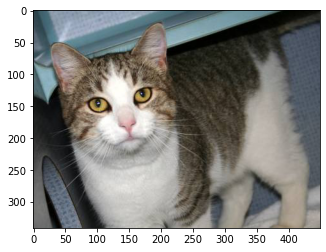

In [17]:
sample = random.choice(train_dir)
image = load_img('./train/'+sample)
plt.imshow(image)